#### Assignment problem statement: 'Find a simple one-humped dataset and model it by matching one of the pdfs we learned about today. Find the most likely parameters of your pdf using MOM.'

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#### This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. It uses different parameters to determine if the cancer is of type benign or malignant. 

In [290]:
cancer = pd.read_csv("C:/Users/lenovo/Downloads/breastCancer.csv", index_col=0, na_values='NA')
cancer.head(10)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [291]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

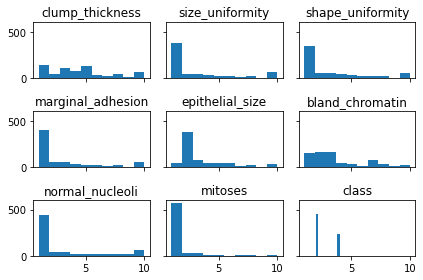

In [292]:
_ = cancer.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

#### Moments of Interest: Mean and Variance

In [293]:
cancer_mean = cancer.mean()
cancer_mean

clump_thickness      4.414634
size_uniformity      3.133429
shape_uniformity     3.206600
marginal_adhesion    2.800574
epithelial_size      3.213773
bland_chromatin      3.433286
normal_nucleoli      2.862267
mitoses              1.591105
class                2.691535
dtype: float64

In [294]:
cancer_var = cancer.var()
cancer_var

clump_thickness      7.947084
size_uniformity      9.319815
shape_uniformity     8.839439
marginal_adhesion    8.116781
epithelial_size      4.903948
bland_chromatin      5.944178
normal_nucleoli      9.308589
mitoses              2.948944
class                0.906150
dtype: float64

In [295]:
alpha_mom = cancer_mean ** 2 / cancer_var
beta_mom = cancer_var / cancer_mean
alpha_mom, beta_mom

(clump_thickness      2.452345
 size_uniformity      1.053495
 shape_uniformity     1.163228
 marginal_adhesion    0.966296
 epithelial_size      2.106127
 bland_chromatin      1.983024
 normal_nucleoli      0.880109
 mitoses              0.858482
 class                7.994665
 dtype: float64,
 clump_thickness      1.800168
 size_uniformity      2.974318
 shape_uniformity     2.756639
 marginal_adhesion    2.898256
 epithelial_size      1.525916
 bland_chromatin      1.731338
 normal_nucleoli      3.252174
 mitoses              1.853394
 class                0.336666
 dtype: float64)

#### Using the gamma.pdf function in scipy.stats.distributions to plot the distributions implied by the calculated alphas and betas for the parameter 'shape_uniformity'

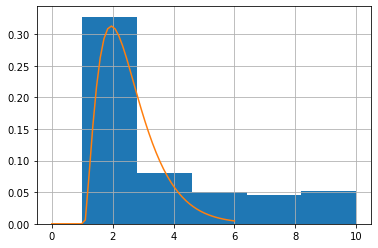

In [301]:
from scipy.stats.distributions import gamma

cancer.shape_uniformity.hist(density=True, bins=5)
plt.plot(np.linspace(0, 6), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

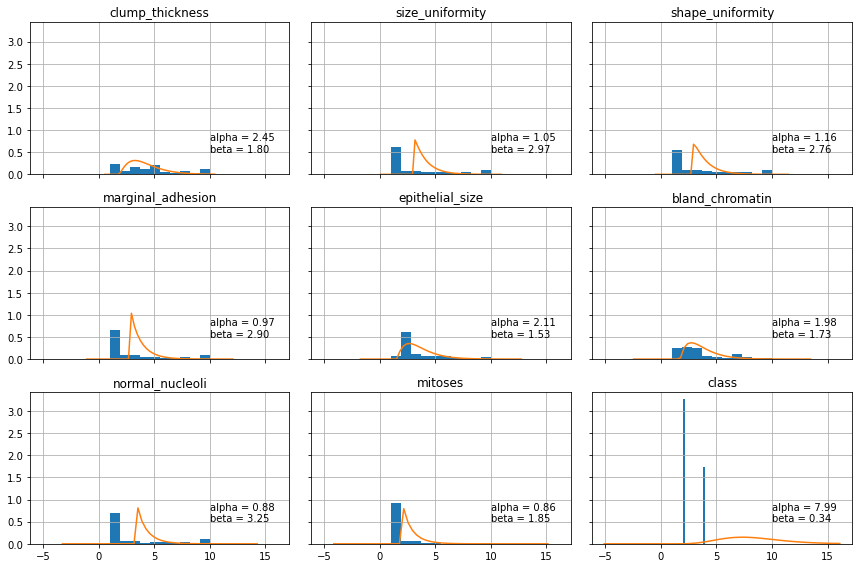

In [297]:
axs = cancer.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.5))

plt.tight_layout()